## zadanie 6 z listy 3

Wysymuluj próbę dla dwuwymiarowego rozkładu normalnego o danym wektorze średnich µ
i macierzy kowariancji Σ o długości 1000. Wyznacz dwuwymiarową dystrybuantę empiryczną
i porównaj ją z dystrybuantą teoretyczną dwywymiarowego rozkładu normalnego z podanymi
parametrami.

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n = 1000

$$\Sigma = \left[ \begin{matrix}
\sigma_x^2 & Cov(X,Y) \\
Cov(Y,X) & \sigma_y^2 
\end{matrix}\right]$$

In [28]:
mean = [2,3]
cov = [[1, 0.5], [0.5, 2]]
# mi = np.matrix(mean).reshape(2,1)
sigma = np.matrix(cov)

In [29]:
X_Y = np.random.multivariate_normal(mean, sigma, size=n)

In [30]:

def ecdf(X, xy):
    F = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            F[i][j] = np.sum((X[:,0]<=xy[i][j][0]) & (X[:,1]<=xy[i][j][1]))/n
    return F


In [31]:
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
X, Y = np.meshgrid(x, y)
por = np.dstack((X, Y))

emp = ecdf(X_Y, por)

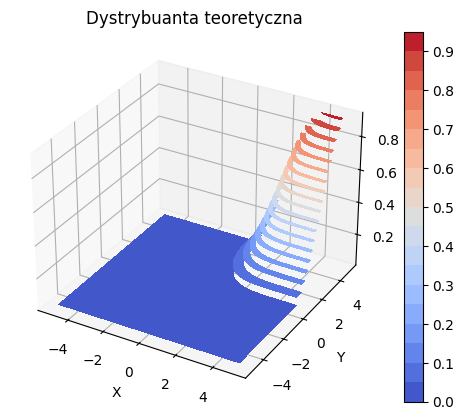

In [33]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
Z = multivariate_normal(mean=mean, cov=cov).cdf(por)
plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
plt.title('Dystrybuanta teoretyczna')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

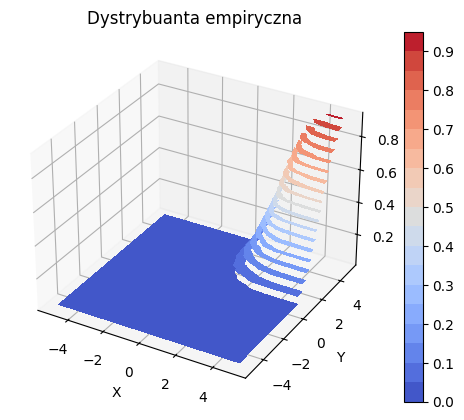

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.contourf(X, Y, emp, levels=20, cmap='coolwarm')
plt.title('Dystrybuanta empiryczna')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()